<a href="https://colab.research.google.com/github/marcellapbp/Aprendendo-Python/blob/master/Alura_Imersao_Dados_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alura Imersão Dados 2020
Notebook dedicado às análise realizadas durante o evento da Alura. <br>
A ideia é aprender conceitos e técnicas de Ciências de dados atráves de aulas durante 19-27 de Outubro com base nos dados do INEP sobre o Enem 2019.

##Aula01

In [16]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#consultando dados
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

df = pd.read_csv(fonte)

df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [5]:
#linhas e colunas
df.shape

(127380, 136)

Dicionário de dados: https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/DICION%C3%81RIO/Dicion%C3%A1rio_Microdados_Enem_2019.xlsx

In [7]:
#descobrindo colunas
df.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [8]:
#conferindo quais estados estão presentes na amostra
df.SG_UF_NASCIMENTO.value_counts()

SP    19664
MG    13189
BA    10337
RJ     8201
PA     7355
CE     7277
PE     6719
MA     5911
RS     5425
PR     5014
PB     3562
GO     3455
PI     3170
RN     2783
AM     2735
DF     2368
ES     2304
AL     2301
SC     2200
MT     1994
SE     1674
MS     1534
RO     1352
TO     1149
AC      948
AP      840
RR      296
Name: SG_UF_NASCIMENTO, dtype: int64

In [10]:
#verificando idades dos inscritos
df.NU_IDADE.value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

Desafio01: Descobrir proporção dos inscritos por idade

(array([53.,  4.,  2.,  2.,  1.,  0.,  1.,  0.,  0.,  2.]),
 array([3.55318171e-05, 7.62548328e-02, 1.52474134e-01, 2.28693435e-01,
        3.04912736e-01, 3.81132037e-01, 4.57351338e-01, 5.33570638e-01,
        6.09789939e-01, 6.86009240e-01, 7.62228541e-01]),
 <a list of 10 Patch objects>)

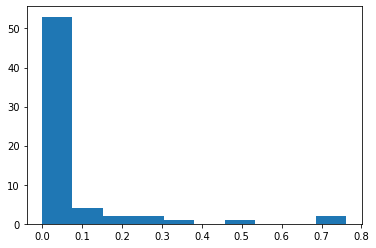

In [21]:
#tentativa 1
Proporcao = (df.NU_IDADE.value_counts().sort_index()/df["NU_IDADE"].sum())*100

#Proporcao
plt.hist(Proporcao)

(array([53.,  4.,  2.,  2.,  1.,  0.,  1.,  0.,  0.,  2.]),
 array([1.00000e+00, 2.14610e+03, 4.29120e+03, 6.43630e+03, 8.58140e+03,
        1.07265e+04, 1.28716e+04, 1.50167e+04, 1.71618e+04, 1.93069e+04,
        2.14520e+04]),
 <a list of 10 Patch objects>)

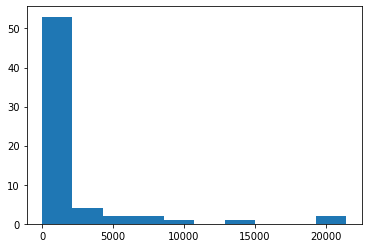

In [22]:
#tentativa 2
plt.hist(df.NU_IDADE.value_counts().sort_index())

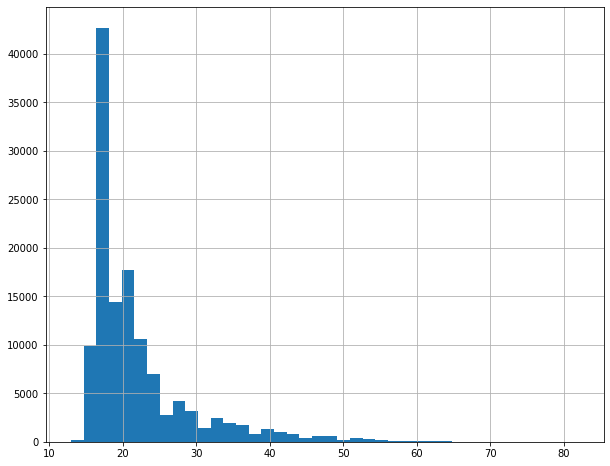

In [37]:
##tentativa 3
#aumentando os bins, pois 13 anos só exitem 4 inscritos, e utilizando o bins padrão distorce a informação
df["NU_IDADE"].hist(bins=40, figsize=(10,8))


Desafio03: Adicionar Titulo no Gráfico

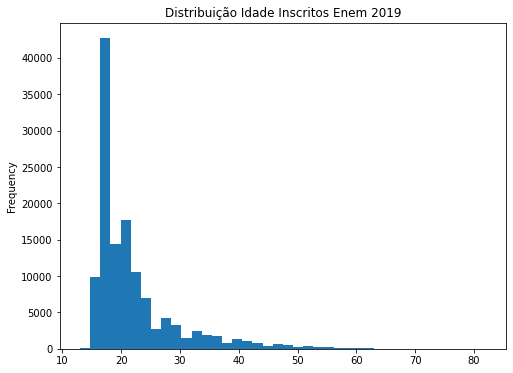

In [63]:
df["NU_IDADE"].plot.hist(bins=40, figsize = (8,6), title="Distribuição Idade Inscritos Enem 2019")

Desafio02: Descobrir de quais estados são os inscritos de 13 anos


In [13]:
  df[df["NU_IDADE"] == 13]["SG_UF_NASCIMENTO"].value_counts()

CE    1
SP    1
AP    1
MT    1
Name: SG_UF_NASCIMENTO, dtype: int64

In [34]:
#selecionando inscritos treineiros
df.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts()

16    7142
17    4901
15    1927
18     858
19     228
20      83
14      64
21      44
22      30
23      21
24      13
26      13
29      10
27       9
25       8
28       6
38       4
40       4
31       4
30       4
42       4
34       3
36       2
39       2
32       2
46       2
44       2
35       2
45       1
41       1
33       1
62       1
48       1
51       1
37       1
47       1
55       1
Name: NU_IDADE, dtype: int64

Desafio04: Plotar histograma dos treineiros por idade

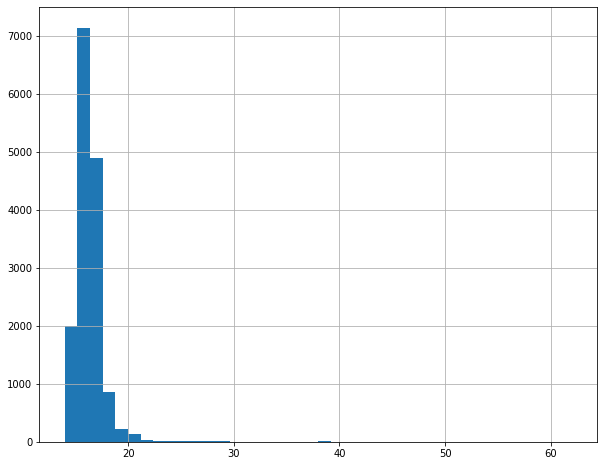

In [46]:
df[df["IN_TREINEIRO"]==1]["NU_IDADE"].hist(bins=40, figsize=(10,8))

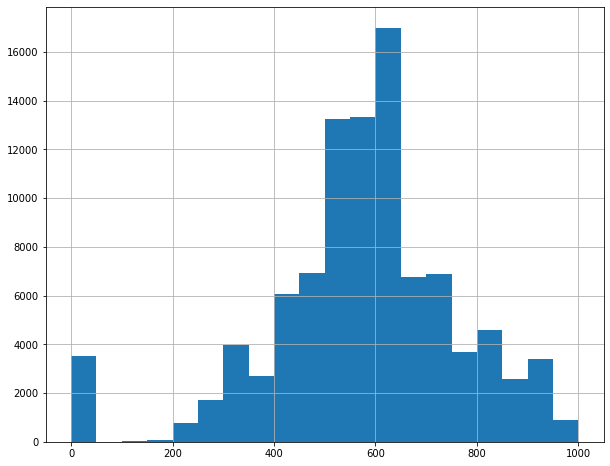

In [49]:
#analisando notas redação
#muitas notas zeros se comparado a outras notas, redação é mais fácil de zerar a nota
df["NU_NOTA_REDACAO"].hist(bins=20, figsize=(10,8))

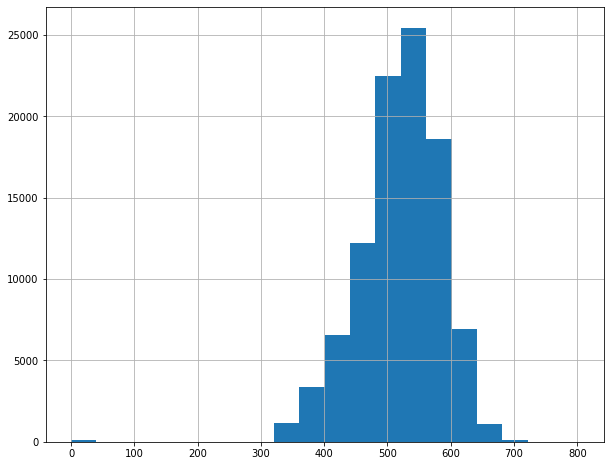

In [50]:
df["NU_NOTA_LC"].hist(bins=20, figsize=(10,8))

In [52]:
#analisar média, desvio padrão e etc
notas = ["NU_NOTA_REDACAO","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_CH","NU_NOTA_CN"]
df[notas].describe()

,NU_NOTA_REDACAO,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_CN
count,98043.000000,98043.000000,92758.000000,98043.000000,92758.000000
mean,571.570025,520.463928,523.555206,507.365912,477.964015
std,188.076455,64.556578,109.416939,82.972839,76.296099
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,480.000000,483.700000,435.300000,447.900000,418.000000
50%,580.000000,526.100000,501.600000,510.900000,470.200000
75%,680.000000,565.100000,598.200000,567.100000,533.300000
max,1000.000000,801.700000,985.000000,809.400000,797.300000


In [53]:
#exemplo para entender quartis
df["NU_NOTA_LC"].quantile(0.9)
#10% das pessoas tiraram nota acima de 596,3
#Ou outra forma de ler o dado é que 90% das pessoas tiraram menos que 596.3

596.3

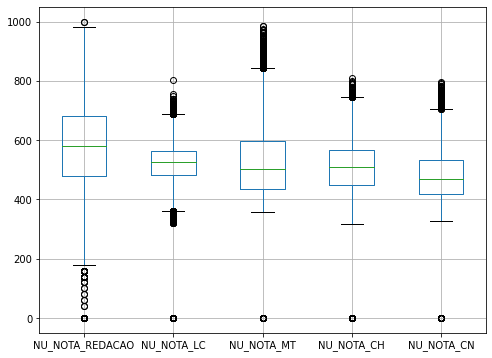

In [57]:
#para analisar visualmente a distribuição das notas, plotar um boxplot

#pontinhos são outliers
#o quadrado representa a concentração da maior parte das notas
#linha no meio do quadrado é a mediana que separa metade dos dados
df[notas].plot.box(figsize=(8,6), grid = True)

Desafio05: Comparar a distribuição das provas em inglês e espanhol

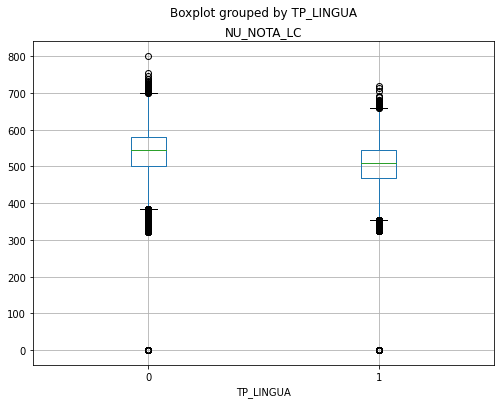

In [62]:
df.boxplot(column="NU_NOTA_LC", by="TP_LINGUA", figsize=(8,6))

Desafio06: Explorar Matplotlib